# Housing price modelling in King County, USA

### Agenda

1. Data exploration
1. Feature engineering
3. Data modelling
4. Models evaluation
5. Choosen model optimization

## 1. Data exploration

Data exploration is a first step to enable power of data. We need to understand business background and meaning of data to specify proper mehods for problem solving. 

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Read csv file
df_01 = pd.read_csv('kc_house_data.csv')

In [3]:
# Show basic informations about data
df_01.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
id               21613 non-null int64
date             21613 non-null object
price            21613 non-null float64
bedrooms         21613 non-null int64
bathrooms        21613 non-null float64
sqft_living      21613 non-null int64
sqft_lot         21613 non-null int64
floors           21613 non-null float64
waterfront       21613 non-null int64
view             21613 non-null int64
condition        21613 non-null int64
grade            21613 non-null int64
sqft_above       21613 non-null int64
sqft_basement    21613 non-null int64
yr_built         21613 non-null int64
yr_renovated     21613 non-null int64
zipcode          21613 non-null int64
lat              21613 non-null float64
long             21613 non-null float64
sqft_living15    21613 non-null int64
sqft_lot15       21613 non-null int64
dtypes: float64(5), int64(15), object(1)
memory usage: 3.5+ MB


In the table above we may see that dataset is very clear, no missings, almost all variables are numeric. 

In [4]:
df_01.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


We need to divide dataset to explanatory part, and target part, which is needed to produce proper data structures as an input to data modelling algorithms.

In [5]:
# select explanatory variables names
cols_X = [col for col in df_01.columns if col not in ['id','date','price']]
cols_X

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'view',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15']

In [6]:
# select explanatory variables
df_X = df_01[cols_X]
df_X[0:10]

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [7]:
# select response variable
df_Y = df_01['price']
df_Y[0:5]

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

## 2. Feature engineering

Feature engineering is the key to reach high prediction accuracy.

## Feature importance

There are many features in dataset, and some are more useful from another. If feature represents very low level of target variable variance, or close to zero, it may even decrease model performance.

So when improving model, we may experiment with poping out less useful variables.

We may measure feature contribution to prediction of target variable for example with Extra Trees Classifier.

In [8]:
from sklearn.ensemble import ExtraTreesClassifier

In [9]:
# Extract ndarrays
Y = df_Y.values
X = df_X.values

### ExtraTreesClassifier importance

In [10]:
# data modelling
model = ExtraTreesClassifier(n_estimators=10)
model.fit(X, Y)

# feature importance extraction
model.feature_importances_

array([0.04215668, 0.0511793 , 0.08651045, 0.09053804, 0.01943386,
       0.00076935, 0.01118276, 0.03059865, 0.03311735, 0.08532852,
       0.04268203, 0.08104938, 0.00674327, 0.05917086, 0.09571885,
       0.08791235, 0.08805353, 0.08785476])

In [11]:
feature_importance = pd.DataFrame(model.feature_importances_,columns=['v'])
feature_importance.iloc[0:5]

,v
0,0.042157
1,0.051179
2,0.086510
3,0.090538
4,0.019434


In [12]:
# Sorting 
feature_importance = pd.concat([pd.DataFrame([cols_X]).T,feature_importance], axis = 1)

In [13]:
feature_importance.iloc[0:4]

,0,v
0,bedrooms,0.042157
1,bathrooms,0.051179
2,sqft_living,0.086510
3,sqft_lot,0.090538


In [14]:
# Sort values
feature_importance_sorted = feature_importance.sort_values(by='v', axis = 0, ascending=False)

In [15]:
feature_importance_sorted[:]

,0,v
14,lat,0.095719
3,sqft_lot,0.090538
16,sqft_living15,0.088054
15,long,0.087912
17,sqft_lot15,0.087855
2,sqft_living,0.086510
9,sqft_above,0.085329
11,yr_built,0.081049
13,zipcode,0.059171
1,bathrooms,0.051179


As we may see in table above, when will be experimenting with improving model performance, variables 5, 12, 6 and 4 will be the very first variables to try training model without.

In [16]:
# X = np.delete(X,[5],1)

Nevertheless during experimentation there was found no improvement while deleting even the worst variables, which were able to do small improvements of MAE.

### Correlation matrix
To reach high performance of modelling, features should be not highly correlated. If we see strong correlation, we may use many techniques to eliminate correlation. There are many ways: 
1. We may use PCA on that group
2. Choose representant of highly correlated variables groups. 
3. Use data whitening transformation

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

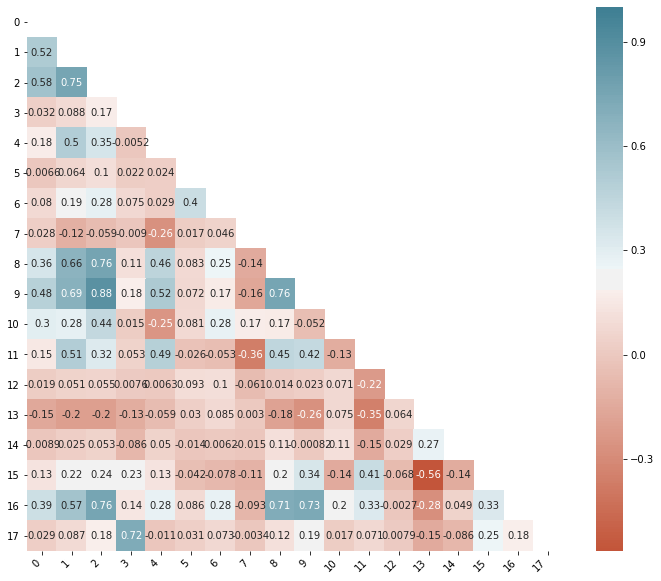

In [18]:
# Create heatmap using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pd.DataFrame(X).corr()
mask = np.zeros_like(cor, dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 
chart = sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200), mask=mask)#,cmap=plt.cm.Reds)
# Rotate labels on Y axis for better view
chart.set_yticklabels(chart.get_xticklabels(), rotation=0, horizontalalignment='right')
# Rotate labels on X axis for better view
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

In the picture above we may see that there is a little room for improvement. 
1. From our data set we that variables 0-2 are medicorely correlated cluster with strenght above 0.5. 
2. This group is also medicorely correlated with variable 16, 8, 9. 
3. Variable 9 is strongly correlated with variable 2.
3. Variable 3 is strongly correlated with variable 17. 
4. Variable 15 is medicorely correlated with variable 13.

If we start improving dataset, those variables are in queue to be merged with PCA.

However, during experimentation merging variables has not shown any improvement in MAE. It shows that even in case of strongly correlated variables in our circumstances their little variance diversity may improvement model performance.

### PCA

In [19]:
"""
from sklearn.decomposition import PCA
pca_01 = PCA(n_components=1)
principal_components_01 = pca_01.fit_transform(X[:,[2,9]])
#principal_array = pd.DataFrame(data = principal_components
#             , columns = ['principal component 1', 'principal component 2']).values
"""

"\nfrom sklearn.decomposition import PCA\npca_01 = PCA(n_components=1)\nprincipal_components_01 = pca_01.fit_transform(X[:,[2,9]])\n#principal_array = pd.DataFrame(data = principal_components\n#             , columns = ['principal component 1', 'principal component 2']).values\n"

In [20]:
# principal_components_01

In [21]:
# X_02 = X
# X_02 = np.delete(X,[2,9],1)

In [22]:
# X_02 = np.concatenate((X_02, principal_components_01), 1)

In [23]:
# X = X_02

In [24]:
"""
# Create heatmap using Pearson Correlation
plt.figure(figsize=(12,10))
cor = pd.DataFrame(X).corr()
sns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200))#,cmap=plt.cm.Reds)
plt.show()
"""

'\n# Create heatmap using Pearson Correlation\nplt.figure(figsize=(12,10))\ncor = pd.DataFrame(X).corr()\nsns.heatmap(cor, annot=True, cmap=sns.diverging_palette(20, 220, n=200))#,cmap=plt.cm.Reds)\nplt.show()\n'

### Feature Scaling
To assure high performance of algorithms, data should be standarized - transform data to state with mean = 0 and STD = 1.

In [25]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

### Data whitening

In [26]:
from scipy.cluster.vq import whiten

In [27]:
X = whiten(X)

During experimentation, data whitening had only impact on improving linear regression and linear regression with L1 penalty models.

## 3. Data modelling and evaluation

For predicting houses prices we need to use algorithms solving regression problems.

For initial modelling we need to divide dataset to training and test part to properly measure models performance. We will use simple measure of MAE - Mean Absolute Error, which is easy to interpret. On further stages, we may use more sofisticated mothods like cross validation to reduce uncertainty of measures.

In [28]:
# Divide on training and validation dataset
from sklearn.model_selection import train_test_split

# split data set into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30, random_state = 10)
# ‘random_state’ just ensures that we get reproducible results every time.
# data - must be all X variables (pandas df / ndarray)
# target - must be Y variable (pandas df / ndarray)


### Linear regression

In [29]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [30]:
# Create and fit linear model
model_01 = LinearRegression().fit(X_train, Y_train)

### Evaluation

In [31]:
# Coefficient of determination on train set
r2_train_01 = model_01.score(X_train, Y_train)
print(r2_train_01)
# Coefficient of determination on test set
r2_test_01 = model_01.score(X_test, Y_test)
print(r2_test_01)

0.6945472174437546
0.7097512256281249


Above we may see how well data is fitted to regression line.

In [32]:
from sklearn.metrics import mean_absolute_error

In [33]:
Y_pred_01 = model_01.predict(X_test)

In [34]:
Y_test_01 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_01 = np.expand_dims(Y_pred_01, axis=0) # (added one more dim)


In [35]:
# Calculate mean absolute error
MAE_01 = mean_absolute_error(Y_test_01[0].tolist(), Y_pred_01[0].tolist())
MAE_01

122993.19597947114

Result - Mean Absolute Error over 100_000, good for a start...

### XGBoost

In [36]:
from xgboost import XGBRegressor

In [37]:
# Create and fit XGBoost model
model_02 = XGBRegressor()
model_02.fit(X_train, Y_train)

[03:49:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

### Evaluation

In [38]:
X_test.shape

(6484, 18)

In [39]:
Y_test.T.shape

(6484,)

In [40]:
# Coefficient of determination on train set
r2_train_02 = model_02.score(X_train,Y_train.T) # R2
print(r2_train_02)
# Coefficient of determination on test set
r2_test_02 = model_02.score(X_test,Y_test.T) # R2
print(r2_train_02)


0.8976818247593008
0.8727663514791497


We may see that XGBoost model fitting expressed in R2 is much better than LM model. We also may see model is not much overfitted - difference between R2 on train and test set is low.  

In [41]:
# Predict values on test set
Y_pred_02 = model_02.predict(X_test)

#### Compare actual and predicted value in table

In [42]:
Y_test_02 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_02 = np.expand_dims(Y_pred_02, axis=0) # (added one more dim)


In [43]:
Y_test_Y_pred_02 = np.concatenate((Y_test_02.T, Y_pred_02.T), axis=1)

In [44]:
Y_test_Y_pred_02

array([[323000.      , 313055.53125 ],
       [690000.      , 620966.      ],
       [142000.      , 249932.703125],
       ...,
       [435000.      , 522666.0625  ],
       [492000.      , 583524.8125  ],
       [480000.      , 477361.4375  ]])

#### Calculate

In [45]:
# Calculate mean absolute error
MAE_02 = mean_absolute_error(Y_test_02[0].tolist(), Y_pred_02[0].tolist())

In [46]:
# Check Calculate mean absolute error
float(sum(abs(Y_test_02[0] - Y_pred_02[0])))/len(Y_test_02.tolist()[0])
# numpy floats had to be converted to float due to facilitate calculations

75519.66906519895

In [47]:
# Check Calculate mean squared error
float(sum((Y_test_02[0] - Y_pred_02[0])**2))/len(Y_test_02.tolist()[0])
# numpy floats had to be converted to float due to facilitate calculations

17549770465.336037

#### Result: MAE 75545.63323662091

The average price is circa 540_000 Dollars and mean absolute error is 75_545 Dollars


### Linear regression + L1 Regularization

In [48]:
from sklearn.linear_model import Lasso

In [49]:
# Create and fit Lasso model
model_03 = Lasso(tol=0.006).fit(X_train,Y_train)
# tol=0.0001 on default

### Evaluation

In [50]:
# Coefficient of determination on train set
r2_train_03=model_03.score(X_train,Y_train)
print(r2_train_03)
# Coefficient of determination on test set
r2_test_03=model_03.score(X_test,Y_test)
print(r2_test_03)

0.694546970032225
0.7097658899906607


In [51]:
from sklearn.metrics import mean_absolute_error

In [52]:
Y_pred_03 = model_01.predict(X_test)

In [53]:
Y_test_03 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_03 = np.expand_dims(Y_pred_03, axis=0) # (added one more dim)


In [54]:
# Calculate mean absolute error
MAE_03 = mean_absolute_error(Y_test_03[0].tolist(), Y_pred_03[0].tolist())
MAE_03

122993.19597947114

### Support Vector Machine Regressor

In [55]:
from sklearn.svm import SVR

In [56]:
# Create and fit SVM regressor model
model_04 = SVR(kernel='rbf').fit(X_train,Y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


### Evaluation

In [57]:
Y_pred_04 = model_04.predict(X_test)

In [58]:
Y_test_04 = np.expand_dims(Y_test, axis=0) # (added one more dim)
Y_pred_04 = np.expand_dims(Y_pred_04, axis=0) # (added one more dim)


In [59]:
# Calculate mean absolute error
MAE_04 = mean_absolute_error(Y_test_04[0].tolist(), Y_pred_04[0].tolist())
MAE_04

219446.2347733178

### K-nearest Neighbours Regressor

In [60]:
#import required packages
from sklearn import neighbors
from math import sqrt
import matplotlib.pyplot as plt

In [61]:
MAE_val = [] #to store MAE values for different k
MAE_05 = 10000000.0
for K in range(10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(X_train, Y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = mean_absolute_error(Y_test,pred) #calculate MAE
    MAE_val.append(error) #store rmse values
    print('MAE value for k= ' , K , 'is:', error)
MAE_05 = min(MAE_val)
    # Return lowest error due to early stopping to prevent overfitting
    #if error < MAE_05:
    #    MAE_05 = error


MAE value for k=  1 is: 107997.9622146823
MAE value for k=  2 is: 94775.44309068476
MAE value for k=  3 is: 89813.50868805264
MAE value for k=  4 is: 88637.6165561382
MAE value for k=  5 is: 87402.27668106108
MAE value for k=  6 is: 87389.96038967717
MAE value for k=  7 is: 87785.11236450162
MAE value for k=  8 is: 87761.73980181986
MAE value for k=  9 is: 87762.13782644458
MAE value for k=  10 is: 88081.89548118446


## 4. Models evaluation

In this section we will compare models performance basing on MAE score. 

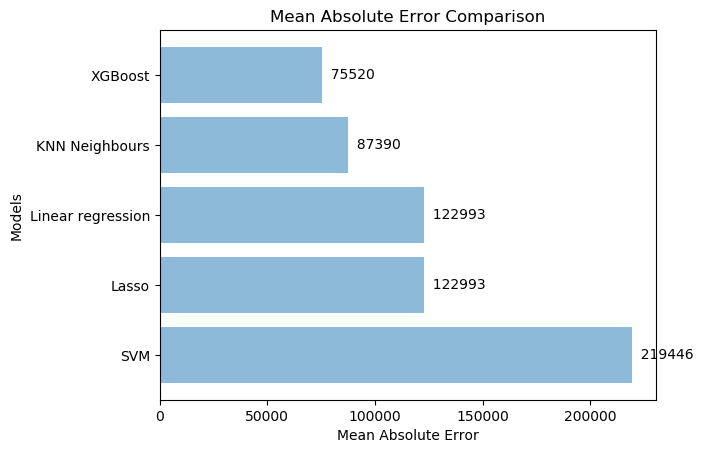

In [62]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Converting numpy floats to floats
MAE_01= float(MAE_01)
MAE_02= float(MAE_02)
MAE_03= float(MAE_03)
MAE_04= float(MAE_04)
MAE_05= float(MAE_05)

# Create list of names visible on X axis
objects = ('SVM','Lasso','Linear regression','KNN Neighbours', 'XGBoost')
# Round performance
MAE = [round(i) for i in list([MAE_04,MAE_03,MAE_01,MAE_05,MAE_02,])]
# Calculate number of positions on Y axis
y_pos = np.arange(len(MAE))

# Create horizontal barpplot
plt.barh(y_pos, MAE, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Models')
plt.title('Mean Absolute Error Comparison')

# Add Names to the chart
for i, v in enumerate(MAE):
    plt.text(v, i, "  "+str(v), color='black', va='center', fontweight='normal')
plt.show()

As we can see in chart above that XGBoost is the most promising model, and on optimizing this model we will concentrate.

## 5. Best model optimization

For model hyperparameters optimization we will use Random Search. In addition to searching hyperspaces, we also incorporate cross-validation technique, to be more sure that our results for each set of hyperparameters are certain, and are not just matter of luck due to favourable division on training and test set.

In case of cross-validation we will have actually training set, validation set and test set. Before we had only training and test set.

Further training and validation sets in cross-validation are created from previous training set. And finally, model is tested on test set.

Lets check which evaluation scores are available in sklearn

In [63]:
import sklearn

In [64]:
# Show available metrics in sklearn
sorted(sklearn.metrics.SCORERS.keys())


['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

Our MAE score is available in inversed version "neg_mean_absolute_error", I it will be used in evaluation.

### Cross-validation and grid search hyperparameters optimization

In [65]:
from scipy import stats
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.metrics import mean_absolute_error 


# Defining parameters which we need to iterate over RS cycles
param_distributions = {'n_estimators': stats.randint(150, 500),
              'learning_rate': stats.uniform(0.01, 0.07),
              'subsample': stats.uniform(0.3, 0.7),
              'max_depth': [3, 4, 5, 6, 7, 8, 9],
              'colsample_bytree': stats.uniform(0.5, 0.45),  
              'min_child_weight': [1, 2, 3]
             }
# in frozen uniforms above eg. stats.randint(), first number 
# is lower boundary of range, and second is a bandwidth

# Initilize estimator
model_11 = XGBRegressor()

# Random Search CV setting
rs = RandomizedSearchCV(model_11, param_distributions, n_iter=6, scoring='neg_mean_absolute_error', cv=4, 
                         verbose=4, n_jobs=-1, random_state=2019)
                        # n_iter - is the total iterations on hyperparameters dataset
                        # (Final results was produced setting up 1000 iterations over there)
                        # cv=4 - number of folds in Cross Validation 
                        # n_jobs=-1 - there will be all available cores used on a machine which run code
                        # verbose=4 - it displays additional information during optimization, if > 0

# Run Random Search with cross-validation
rs_results = rs.fit(X_train, Y_train)
print("BEST PARAMETERS: " + str(rs_results.best_params_))
print("BEST CV SCORE: " + str(rs_results.best_score_))

# Predict with best parametrized model
y_pred = rs.predict(X_test)

# Score
score = mean_absolute_error(Y_test, y_pred)
print("MAE SCORE ON TEST DATA: {}".format(score))



Fitting 4 folds for each of 6 candidates, totalling 24 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed:  2.0min finished


[03:53:18] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
BEST PARAMETERS: {'colsample_bytree': 0.8112263109022794, 'learning_rate': 0.0708905218710399, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 288, 'subsample': 0.44079033274856383}
BEST CV SCORE: -66330.83733847247
MAE SCORE ON TEST DATA: 63965.14881101558


### Results from optimisation
Grid search with cross-validation has been run few times due to experimentation on my local machine. I was using 2 cores with 2 threads each core, and also performing optimization on Google Colaboratory with Nvidia GPU acceleration, which was circa twice as fast as my machine.

This is best set of parameters from optimization. Down under we may see Results of random rearch with cross-validation performed on Google Colaboratory cloud, which GPU accelerated computing power is based Tesla on the board.

##### Message from console:

"""
Fitting 4 folds for each of 1000 candidates, totalling 4000 fits

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 4000 out of 4000 | elapsed: 228.2min finished

BEST PARAMETERS: 

{'colsample_bytree': 0.8797073668939202, <br />
                  'learning_rate': 0.03689137038882592, <br />
                  'max_depth': 9, <br />
                  'min_child_weight': 2, <br />
                  'n_estimators': 498, <br />
                  'subsample': 0.6278862963535177}<br />
                  
BEST CV SCORE: -64670.427694225495

MAE SCORE ON TEST DATA: 62771.05599118985
"""

##### As we can see, it took over 3,5h for Tesla Graphic card to produce our results. The Best set of parameters gives us MAE of 62771.


### Final model score comparison on test set

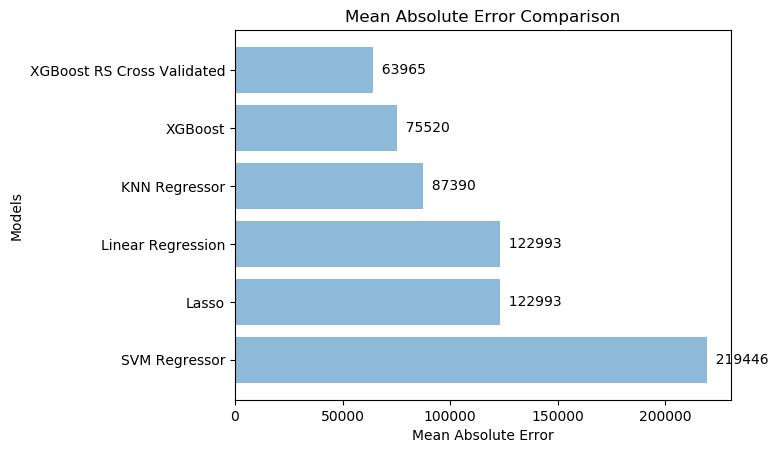

In [66]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

# Converting numpy floats to floats
MAE_01= float(MAE_01)
MAE_02= float(MAE_02)
MAE_03= float(MAE_03)
MAE_04= float(MAE_04)
MAE_05= float(MAE_05)
MAE_06= float(score)

# Create tuple of Y axis labels
objects = ('SVM Regressor','Lasso','Linear Regression','KNN Regressor', 'XGBoost','XGBoost RS Cross Validated')
# Create list of MAE scores
MAE = [round(i) for i in list([MAE_04,MAE_03,MAE_01,MAE_05,MAE_02,MAE_06])]
# Create position index for this score on the chart
y_pos = np.arange(len(MAE))

# Create horizontal barplot
plt.barh(y_pos, MAE, align='center', alpha=0.5)
plt.yticks(y_pos, objects)
plt.xlabel('Mean Absolute Error')
plt.ylabel('Models')
plt.title('Mean Absolute Error Comparison')

# Add text labels on the right from the bars 
for i, v in enumerate(MAE):
    plt.text(v, i, "  "+str(v), color='black', va='center', fontweight='normal')
plt.show()

As we can see in the chart above, Mean Absolute Error is going down much below initial 75_520 result to the result 65_000 and lower. Depending from number of iteration during optimization it may go even lower.

### Afterword

In the future more tasks may be done to inscrease performance:
1. Experiment with increasing number of iterations in random search
1. Experiment with more advanced meta-heuristic search methods
2. Experiment with expanding parameters range during optimization
3. Transform and involve date column, which may add improvement 
4. Study deeper XGBoost architecture to get more ideas how to improve it
5. Test another algorithms like Artficial Neural Network 
    
